### CPU Usage & Memory Information

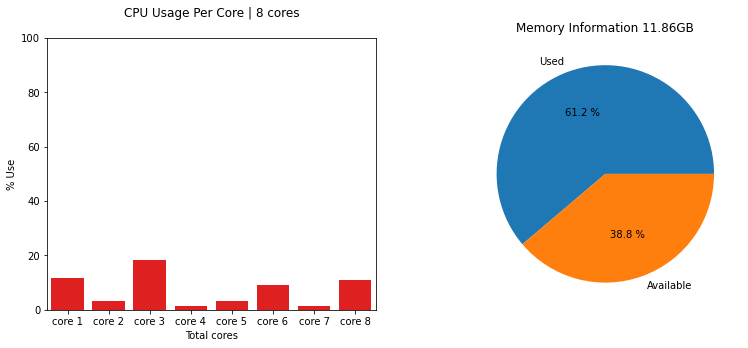

In [1]:
import psutil
import pandas as pd
import platform
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

# Visual representation
name_cores = []
percentage_cores = []
fig = plt.figure(figsize = (20,5))

# BarPlot
plot = 1
fig.add_subplot(130+plot)
for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
    name_cores.append(f"core {i+1}")
    percentage_cores.append(percentage)

df_usage = pd.DataFrame({"cores":name_cores, "% uso":percentage_cores})
ax = sns.barplot(y="% uso", x="cores", data=df_usage, color = "red", orient="v") 
ax.set(title=f'CPU Usage Per Core | {psutil.cpu_count(logical=True)} cores\n', xlabel='Total cores', ylabel='% Use', ylim=(0,100));

#Pie
plot = 2
fig.add_subplot(130+plot)
svmem = psutil.virtual_memory()
data = [svmem.percent,100-svmem.percent]
labels=['Used','Available']
plt.pie(data, labels=labels, autopct='%.1f %%')
plt.title(f'Memory Information {get_size(svmem.total)}');

### Disk Information

In [11]:
print("="*40, "Disk Information", "="*40)
print("Partitions and Usage:")
# get all disk partitions
partitions = psutil.disk_partitions()
for partition in partitions:
    print(f">>> Device: {partition.device}")
    try:
        partition_usage = psutil.disk_usage(partition.mountpoint)
    except PermissionError:
        # this can be catched due to the disk that
        # isn't ready
        continue
    print(f"  Total Size: {get_size(partition_usage.total)}")
    print(f"  Used: {get_size(partition_usage.used)}")
    print(f"  Free: {get_size(partition_usage.free)}")
    print(f"  Percentage: {partition_usage.percent}%")


======================================== Disk Information ========================================
Partitions and Usage:
>>> Device: C:\
  Total Size: 237.97GB
  Used: 191.87GB
  Free: 46.10GB
  Percentage: 80.6%
